In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('fake_reg.csv')

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [30]:
X = df[['feature1','feature2']].values

In [31]:
y = df['price'].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
scaler.fit(X_train)

MinMaxScaler()

In [36]:
X_train = scaler.transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [41]:
model.fit(x=X_train, y=y_train, epochs=500)

p - loss: 55.7256
Epoch 261/500
22/22 [==============================] - 0s 6ms/step - loss: 54.4470
Epoch 262/500
22/22 [==============================] - 0s 4ms/step - loss: 52.8550
Epoch 263/500
22/22 [==============================] - 0s 4ms/step - loss: 51.6139
Epoch 264/500
22/22 [==============================] - 0s 4ms/step - loss: 50.4073
Epoch 265/500
22/22 [==============================] - 0s 4ms/step - loss: 49.2294
Epoch 266/500
22/22 [==============================] - 0s 3ms/step - loss: 47.9676
Epoch 267/500
22/22 [==============================] - 0s 3ms/step - loss: 46.5476
Epoch 268/500
22/22 [==============================] - 0s 4ms/step - loss: 45.5759
Epoch 269/500
22/22 [==============================] - 0s 3ms/step - loss: 44.4278
Epoch 270/500
22/22 [==============================] - 0s 3ms/step - loss: 43.3313
Epoch 271/500
22/22 [==============================] - 0s 3ms/step - loss: 42.2762
Epoch 272/500
22/22 [==============================] - 0s 2ms/step - 

In [42]:
loss_df = pd.DataFrame(model.history.history)

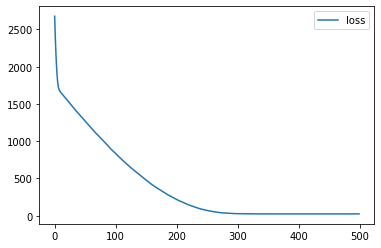

In [43]:
loss_df.plot()

In [44]:
model.evaluate(X_test,y_test,verbose=0)

24.95818519592285

In [45]:
model.evaluate(X_train,y_train, verbose=0)

23.813100814819336

In [46]:
test_predictions = model.predict(X_test)

In [48]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [60]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [61]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [62]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [64]:
pred_df

,Test True Y,Model Predictions
0,402.296319,405.267914
1,624.156198,623.632080
2,582.455066,592.211670
3,578.588606,572.283142
4,371.224104,366.557770
...,...,...
295,525.704657,529.080505
296,502.909473,515.339966
297,612.727910,609.738770
298,417.569725,416.947205


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [66]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.000111960261028

In [68]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

24.958189412534693

In [69]:
new_gem = [[998, 1000]]

In [70]:
new_gem = scaler.transform(new_gem)

In [71]:
model.predict(new_gem)

array([[419.65683]], dtype=float32)

In [72]:
from tensorflow.keras.models import load_model

In [73]:
model.save('demoANN.h5')

In [74]:
later_model = load_model('demoANN.h5')

In [75]:
later_model.predict(new_gem)

array([[419.65683]], dtype=float32)